In [1]:
from rich import print
import logging

logging.basicConfig(level=logging.INFO)

## Observations from [Phenocam](hhttps://phenocam.nau.edu/webcam/)

Download [phenocam observations](https://phenocam.nau.edu/webcam/) using [phenocamR](https://github.com/bluegreen-labs/phenocamr)

To use, install phenocamR in your springtime environment:

```R
install.packages("phenocamr")
```


## Browsing sites

Phenocam data is available at various sites. You can [browse them visually](https://phenocam.nau.edu/webcam/network/map/) on the phenocam website. Alternatively, a list is available with all phenocam sites. This list can be loaded in springtime.


In [2]:
from springtime.datasets.phenocam import list_sites

phenocam_sites = list_sites()
phenocam_sites.query('site=="harvard"')

,site,elev,contact1,contact2,date_start,date_end,nimage,tzoffset,active,infrared,...,MAP_worldclim,dominant_species,primary_veg_type,secondary_veg_type,koeppen_geiger,ecoregion,wwf_biome,landcover_igbp,site_acknowledgements,geometry
226,harvard,340.0,Andrew Richardson <andrew DOT richardson AT na...,Bill Munger <jwmunger AT seas DOT harvard DOT ...,2008-04-04,2024-01-08,190650,-5.0,True,N,...,1139.0,"Quercus rubra, Acer rubrum, Pinus strobus",DB,EN,Dfb,5.0,4.0,5.0,The Harvard EMS site is supported is an AmeriF...,POINT (-72.17150 42.53780)


As you can see, the listing contains information on the data availability, as well as additional info such as the climate zones of each site, the dominant species, and the exact latitude/longitude coordinates.

Note that there are also many non-exact matches.


In [3]:
harvard_like = phenocam_sites.query('site.str.contains("harvard")')
print(len(harvard_like), "site names containing harvard")
harvard_like["site"].values

12 site names containing harvard

array(['harvard', 'harvardbarn', 'harvardbarn2', 'harvardblo',
       'harvardchill', 'harvardems2', 'harvardfarmnorth',
       'harvardfarmsouth', 'harvardgarden', 'harvardhemlock',
       'harvardhemlock2', 'harvardlph'], dtype=object)

Following the convention of phenocamR, springtime looks for exact site matches by appending a dollar sign after the site name: "harvard$".

## Regions of interest

Phenocam data consists of series of pictures taken at a fixed site but different times. Depending on the setup of the system, the picture may contain one or multiple types of vegetation and other objects. To derive plant phenometrics from such pictures, each site can define multiple regions of interest (ROIs). For example, this [harvard site ROI](https://phenocam.nau.edu/webcam/roi/harvard/DB_0001/) crops off the sky and a beam of the instrumentation.

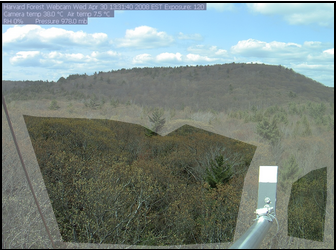

All ROIs for all sites can be listed using the `list_rois` function.


In [4]:
from springtime.datasets.phenocam import list_rois

phenocam_rois = list_rois()
phenocam_rois.query('site=="harvard"')

,site,veg_type,roi_id_number,description,first_date,last_date,site_years,missing_data_pct,geometry
333,harvard,DB,1,Deciduous trees in foreground,2008-04-04,2024-01-08,15.7,0.0,POINT (-72.17150 42.53780)
334,harvard,DB,1000,Deciduous trees in foreground,2008-04-04,2024-01-08,15.7,0.0,POINT (-72.17150 42.53780)


## Retrieving site data


In [5]:
from springtime.datasets import Phenocam

# Use $ in site name to get an exact match
dataset = Phenocam(site="harvard$", years=(2010, 2015))
print(dataset)

Phenocam(
    dataset='phenocam',
    years=YearRange(start=2010, end=2015),
    veg_type=None,
    frequency='3',
    variables=[],
    site='harvard$',
    roi_id=None,
    area=None
)

In [6]:
df = dataset.raw_load()
df.head()

INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Looking for data
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_0001_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_1000_3day.csv


,site,roi_id_number,veg_type,date,year,doy,image_count,midday_filename,midday_r,midday_g,...,smooth_rcc_90,smooth_ci_gcc_mean,smooth_ci_gcc_50,smooth_ci_gcc_75,smooth_ci_gcc_90,smooth_ci_rcc_mean,smooth_ci_rcc_50,smooth_ci_rcc_75,smooth_ci_rcc_90,int_flag
0,harvard,0001,DB,2008-01-05,2008,5,NaN,NaN,NaN,NaN,...,0.31592,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,1.0
1,harvard,0001,DB,2008-01-06,2008,6,NaN,NaN,NaN,NaN,...,0.31552,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,1.0
2,harvard,0001,DB,2008-01-07,2008,7,NaN,NaN,NaN,NaN,...,0.31514,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,1.0
3,harvard,0001,DB,2008-01-08,2008,8,NaN,NaN,NaN,NaN,...,0.31476,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,1.0
4,harvard,0001,DB,2008-01-09,2008,9,NaN,NaN,NaN,NaN,...,0.31441,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,1.0


Notice that the filenames don't contain the requested year range: phenocam time series are downloaded in full. As per the springtime conventional, `raw_load` remains true to the data on disk. In the load method, we filter out the requested year range. Additionally, we convert to a pandas geodataframe.


In [7]:
df = dataset.load()
df.head()

INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Looking for data
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_0001_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_1000_3day.csv


,datetime,geometry,roi_id_number,veg_type,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,r_mean,...,smooth_rcc_90,smooth_ci_gcc_mean,smooth_ci_gcc_50,smooth_ci_gcc_75,smooth_ci_gcc_90,smooth_ci_rcc_mean,smooth_ci_rcc_50,smooth_ci_rcc_75,smooth_ci_rcc_90,int_flag
0,2010-01-01,POINT (-72.17150 42.53780),0001,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31163,0.00306,0.00305,0.00318,0.00370,0.00721,0.00795,0.00699,0.00660,NaN
1,2010-01-02,POINT (-72.17150 42.53780),0001,DB,52.19172,71.35788,75.82381,0.35791,0.26178,48.39274,...,0.31155,0.00301,0.00300,0.00313,0.00364,0.00709,0.00782,0.00688,0.00650,NaN
2,2010-01-03,POINT (-72.17150 42.53780),0001,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31160,0.00297,0.00296,0.00308,0.00359,0.00699,0.00771,0.00678,0.00640,NaN
3,2010-01-04,POINT (-72.17150 42.53780),0001,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31175,0.00295,0.00294,0.00307,0.00357,0.00696,0.00767,0.00674,0.00637,NaN
4,2010-01-05,POINT (-72.17150 42.53780),0001,DB,54.79733,68.07477,65.62895,0.36114,0.29070,58.15591,...,0.31197,0.00297,0.00297,0.00309,0.00360,0.00701,0.00773,0.00680,0.00642,NaN


## Search data in bounding box

Instead of loading a single site, we can also search for sites within given coordinate bounds.


In [8]:
harvard = {"name": "harvard", "bbox": [-73, 42, -72, 43]}

dataset = Phenocam(area=harvard, years=[2019, 2020])

print(dataset)

Phenocam(
    dataset='phenocam',
    years=YearRange(start=2019, end=2020),
    veg_type=None,
    frequency='3',
    variables=[],
    site=None,
    roi_id=None,
    area=NamedArea(name='harvard', bbox=BoundingBox(xmin=-73.0, ymin=42.0, xmax=-72.0, ymax=43.0))
)

In [9]:
dataset.load()
df = dataset.load()
df.head()

INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Looking for data
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/bbc1_DB_1000_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/bbc2_DB_1000_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_0001_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvard_DB_1000_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvardbarn_DB_1000_3day.csv
INFO:/home/peter/phenology/springtime/src/springtime/datasets/phenocam.py:Found /home/peter/.cache/springtime/phenocam/harvardbarn_EN_1000_3day.csv
INFO:/home/peter/phenology/springtime/src/s

,datetime,geometry,roi_id_number,veg_type,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,r_mean,...,smooth_rcc_90,smooth_ci_gcc_mean,smooth_ci_gcc_50,smooth_ci_gcc_75,smooth_ci_gcc_90,smooth_ci_rcc_mean,smooth_ci_rcc_50,smooth_ci_rcc_75,smooth_ci_rcc_90,int_flag
0,2019-01-01,POINT (-72.17436 42.53508),1000,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33691,0.00290,0.00310,0.00320,0.00321,0.00903,0.00921,0.00947,0.00925,NaN
1,2019-01-02,POINT (-72.17436 42.53508),1000,DB,84.86659,85.59192,85.59225,0.33428,0.33144,75.33211,...,0.33514,0.00282,0.00301,0.00311,0.00312,0.00877,0.00895,0.00921,0.00899,NaN
2,2019-01-03,POINT (-72.17436 42.53508),1000,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33330,0.00283,0.00302,0.00313,0.00313,0.00881,0.00899,0.00924,0.00903,NaN
3,2019-01-04,POINT (-72.17436 42.53508),1000,DB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33180,0.00293,0.00313,0.00324,0.00324,0.00912,0.00931,0.00957,0.00935,NaN
4,2019-01-05,POINT (-72.17436 42.53508),1000,DB,60.30106,67.32647,78.02750,0.32738,0.29321,70.06766,...,0.33101,0.00301,0.00321,0.00332,0.00332,0.00935,0.00955,0.00982,0.00959,NaN


## Export as recipe

As always, we can export the dataset as recipe for sharing and reproducibility.


In [10]:
print(dataset.to_recipe())

dataset: phenocam
years:
- 2019
- 2020
frequency: '3'
variables: []
area:
  name: harvard
  bbox:
  - -73.0
  - 42.0
  - -72.0
  - 43.0

## TODO

We are already excited about working with phenocam data, but in order to combine it with other springtime datasets, we need to do a bit more work.

- Extract relevant variables / infer events
- Pivot dataframe such that it has one row per year/site.
